# Part 1 - Cleaning numerical data

In [1]:
# 1. Import the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info)

In [3]:
pd.set_option('display.max_columns', 50)
customer_df.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
round(customer_df.isnull().sum()/len(customer_df),3)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

4. Then rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [7]:
# Start with the lower case :
customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns))
customer_df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [8]:
# Then replace white spaces by underscores

def clean_underscore(x) :
    if " " in x :
        return x.replace(" ", "_")
    else : 
        return x

In [9]:
customer_df.columns = list(map(clean_underscore, customer_df.columns))
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [10]:
def clean_dateformat(x) :
    return pd.to_datetime(x, errors = 'coerce')

customer_df.effective_to_date = list(map(clean_dateformat, customer_df.effective_to_date))
print(customer_df.effective_to_date.dtypes)
customer_df.effective_to_date.head()

datetime64[ns]


0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

6. Define a function that differentiates between continuous and discrete variables. 
Hint: The number of unique values might be useful. 
Store continuous data into a continuous_df variable and do the same for discrete_df

In [11]:
# Let's first divide the dataframe into numerical / categorical data

numericals = customer_df.select_dtypes(np.number)
display(numericals.head())
categoricals = customer_df.select_dtypes(np.object)
display(categoricals.head())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/1374061061.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [34]:
# Let's check unique values for numericals using a loop :
for col in numericals.columns :
    print("The number of unique values for",col, "is :", numericals[col].nunique())

The number of unique values for customer_lifetime_value is : 8041
The number of unique values for income is : 5694
The number of unique values for monthly_premium_auto is : 202
The number of unique values for months_since_last_claim is : 36
The number of unique values for months_since_policy_inception is : 100
The number of unique values for number_of_open_complaints is : 6
The number of unique values for number_of_policies is : 9
The number of unique values for total_claim_amount is : 5106


In [143]:
# Continuous (varying data over a specific time interval) : if .nunique > 10
# Discrete (fixed and determined by counting): number_of_open_complaints // number_of_policies

In [21]:
def split_dataframe(df, number_uniques = 10) : 
    df2 = df.copy()
    continuous_list = []
    discrete_list = []
    for col in list(df2.columns) :
        if (df2[col].nunique() > 10) : 
            continuous_list.append(col)
        else : 
            discrete_list.append(col) 
    continuous_df = df2[continuous_list]
    discrete_df = df2[discrete_list]
    return continuous_df, discrete_df

In [23]:
continuous_df, discrete_df = split_dataframe(numericals,10)
display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


7. Plot a correlation matrix, comment what you see.

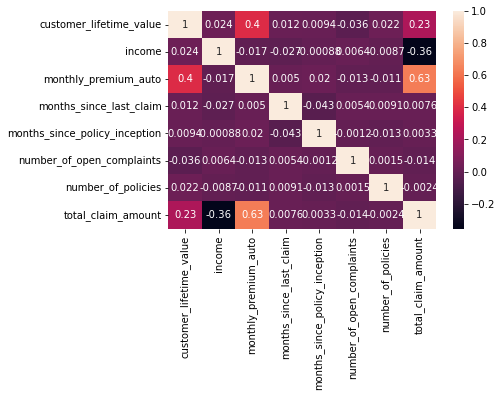

In [24]:
corr_matrix = numericals.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

8. Create a function to plot every discrete variable. Do the same with the continuous variables 
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


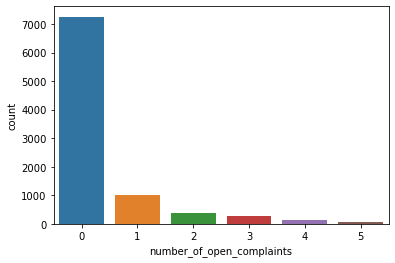

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


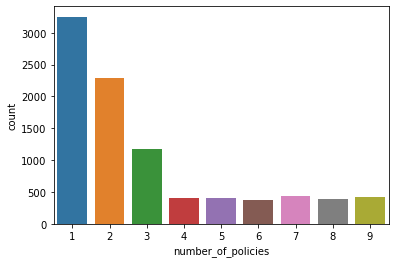

number_of_open_complaints    None
number_of_policies           None
dtype: object

In [25]:
def plot_discrete(x) :
    sns.countplot(x)
    plt.show()
    
discrete_df.apply(plot_discrete)

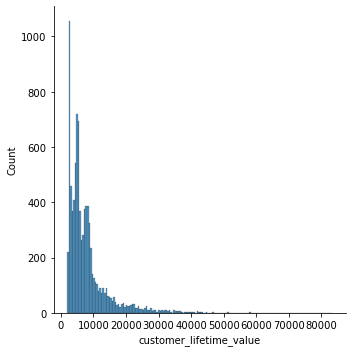

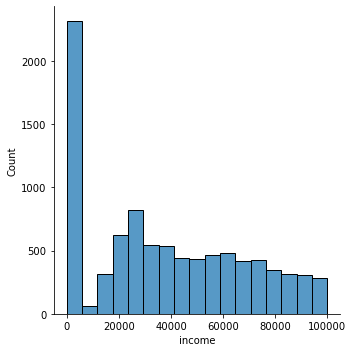

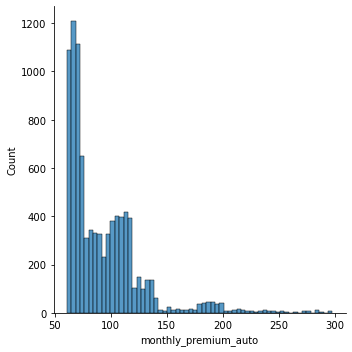

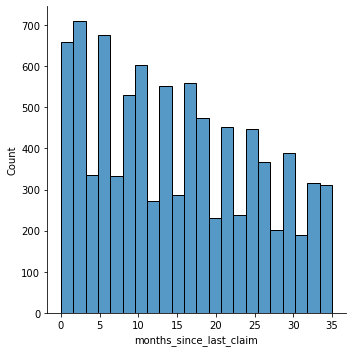

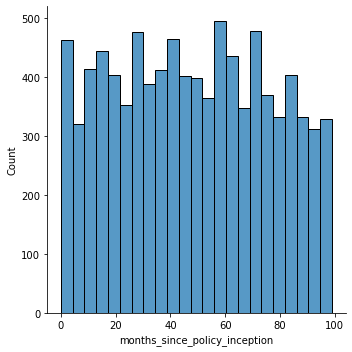

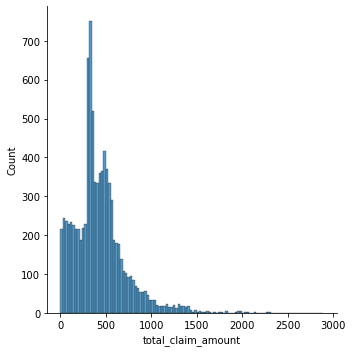

customer_lifetime_value          None
income                           None
monthly_premium_auto             None
months_since_last_claim          None
months_since_policy_inception    None
total_claim_amount               None
dtype: object

In [26]:
def plot_continuous(x) :
    sns.displot(x)
    plt.show()
    
continuous_df.apply(plot_continuous)

In [28]:
# Let's have a closer look to income :
low_income = customer_df[customer_df['income'] == 0]
low_income

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
10,SX51350,California,4738.992022,No,Basic,College,2011-02-21,Unemployed,M,0,Suburban,Single,67,23,5,0,3,Personal Auto,Personal L3,Offer1,Agent,482.400000,Four-Door Car,Small
11,VQ65197,California,8197.197078,No,Basic,College,2011-01-06,Unemployed,F,0,Suburban,Married,110,27,87,0,3,Personal Auto,Personal L3,Offer2,Agent,528.000000,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,WZ45103,California,5678.050167,Yes,Extended,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small
9125,RX91025,California,19872.262000,No,Premium,High School or Below,2011-01-31,Unemployed,M,0,Suburban,Single,185,26,35,0,2,Personal Auto,Personal L3,Offer1,Agent,1950.725547,SUV,Small
9126,AC13887,California,4628.995325,No,Basic,Bachelor,2011-01-09,Unemployed,M,0,Suburban,Single,67,25,21,0,4,Corporate Auto,Corporate L1,Offer1,Branch,482.400000,Two-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [29]:
low_income['employmentstatus'].value_counts()

# these incomes equal to 0 correspond to the unemployed people. We want to keep them as it is

Unemployed    2317
Name: employmentstatus, dtype: int64

10. Look for outliers in the continuous variables. 
(HINT: There’s a good plot to do that!)

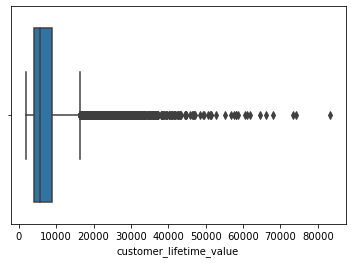

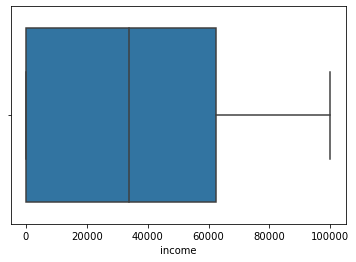

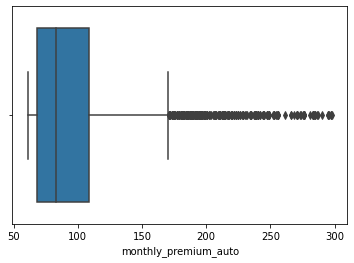

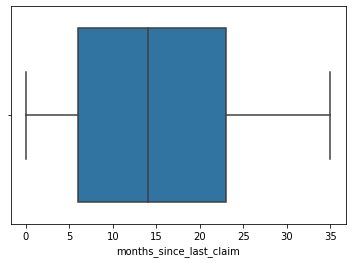

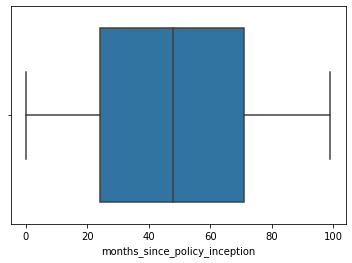

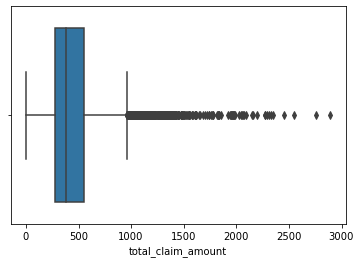

customer_lifetime_value          None
income                           None
monthly_premium_auto             None
months_since_last_claim          None
months_since_policy_inception    None
total_claim_amount               None
dtype: object

In [30]:
def plot_outliers(x) :
    sns.boxplot(x = x)
    plt.show()
    
continuous_df.apply(plot_outliers)

11. Did you find outliers? Comment what you will do with them.

In [48]:
# Let's check for each variable what these outliers represent in terms of proportion :

# For customer_lifetime_value, with 90% percentiles :
iqr1 = np.percentile(continuous_df['customer_lifetime_value'],90) - np.percentile(continuous_df['customer_lifetime_value'],10)
upper_limit1 = np.percentile(continuous_df['customer_lifetime_value'],90) + 1.5*iqr1
print("Outliers start with the value :", upper_limit1)

outliers1 = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit1]
print("The number of outliers for customer_lifetime_value is :", len(outliers1))
print("In % :", round(len(outliers1)/len(continuous_df)*100,2))


Outliers start with the value : 34590.826513100015
The number of outliers for customer_lifetime_value is : 114
In % : 1.25


In [49]:
# For monthly_premium_auto :
iqr2 = np.percentile(continuous_df['monthly_premium_auto'],90) - np.percentile(continuous_df['monthly_premium_auto'],10)
upper_limit2 = np.percentile(continuous_df['monthly_premium_auto'],90) + 1.5*iqr2
print("Outliers start with the value :", upper_limit2)

outliers2 = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit2]
print("The number of outliers for monthly_premium_auto is :", len(outliers2))
print("In % :", round(len(outliers2)/len(continuous_df)*100,2))

Outliers start with the value : 226.5
The number of outliers for monthly_premium_auto is : 93
In % : 1.02


In [50]:
# For total_claim_amount :
iqr3 = np.percentile(continuous_df['total_claim_amount'],90) - np.percentile(continuous_df['total_claim_amount'],10)
upper_limit3 = np.percentile(continuous_df['total_claim_amount'],90) + 1.5*iqr3
print("Outliers start with the value :", upper_limit3)

outliers3 = continuous_df[continuous_df['total_claim_amount'] > upper_limit3]
print("The number of outliers for total_claim_amount is :", len(outliers3))
print("In % :", round(len(outliers3)/len(continuous_df)*100,2))

Outliers start with the value : 1777.45647645
The number of outliers for total_claim_amount is : 38
In % : 0.42


My options to deal with outliers are : 
- drop them from the dataframe
- filter them out to exclude them from my model after (but keeping them in the dataframe)
- replacing them with another value (ex : mean, median...)
- rescaling them with log.transformation

I choose to apply the log transfo to the 3 columns to rescale the data but being able to use them.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [47]:
round(customer_df.isnull().sum()/len(customer_df),3)
# There are no NaN's values. 

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Part 2 - Cleaning categorical data

In [60]:
# 1. Find all of the categorical data. Save it in a categorical_df variable.

categoricals = customer_df.select_dtypes(np.object)
display(categoricals.head())

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_59788/3791049814.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [61]:
# 2. Check for NaN values.
categoricals.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [62]:
# 3. Check all unique values of columns.
display(categoricals.customer.value_counts())
display(categoricals.state.value_counts())
display(categoricals.response.value_counts())
display(categoricals.coverage.value_counts())
display(categoricals.education.value_counts())
display(categoricals.employmentstatus.value_counts())
display(categoricals.gender.value_counts())
display(categoricals.location_code.value_counts())
display(categoricals.marital_status.value_counts())
display(categoricals.policy_type.value_counts())
display(categoricals.policy.value_counts())
display(categoricals.renew_offer_type.value_counts())
display(categoricals.sales_channel.value_counts())
display(categoricals.vehicle_class.value_counts())
display(categoricals.vehicle_size.value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [63]:
# we can drop the columns : customer (makes no sense here) & policy (double / repeated info with policy_type)
categoricals = categoricals.drop(['customer', 'policy'], axis = 1)

In [64]:
# 4. Check dtypes. Do they all make sense as categorical data?
categoricals.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [65]:
def clean_education(x) :
    if x in ['Master', 'Doctor'] :
        return 'High Degree'
    else :
        return x

categoricals.education = categoricals.education.apply(clean_education)
categoricals.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
High Degree             1083
Name: education, dtype: int64

In [66]:
def clean_employment(x) :
    if x in ['Medical Leave', 'Retired', 'Disabled'] :
        return 'Not working'
    else :
        return x

categoricals.employmentstatus = categoricals.employmentstatus.apply(clean_employment)
categoricals.employmentstatus.value_counts()

Employed       5698
Unemployed     2317
Not working    1119
Name: employmentstatus, dtype: int64

In [67]:
def clean_vehicle_class(x) :
    if x in ['Luxury SUV', 'Luxury Car'] :
        return 'Luxury'
    else :
        return x

categoricals.vehicle_class = categoricals.vehicle_class.apply(clean_vehicle_class)
categoricals.vehicle_class.value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury            347
Name: vehicle_class, dtype: int64

In [68]:
# I'll use OneHotEncoder to be able to work with these categorical data afterwards.
# no need to do the x/y split and train/test split at this stage

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals)

categoricals_encoded = encoder.transform(categoricals).toarray()

categoricals_encoded = pd.DataFrame(categoricals_encoded, columns = encoder.get_feature_names_out())
display(categoricals_encoded.head())

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_High Degree,education_High School or Below,employmentstatus_Not working,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
# 8. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes
# I already did it in question 4 when I groupped underrepresented values in some of the columns.
# That was helpful for the OneHotEncoder step !

# But let's check once more the unique values for each columns, this time with a loop :
for col in categoricals.columns:
    print(col,": \n",categoricals[col].value_counts(),"\n" )

state : 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

response : 
 No     7826
Yes    1308
Name: response, dtype: int64 

coverage : 
 Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

education : 
 Bachelor                2748
College                 2681
High School or Below    2622
High Degree             1083
Name: education, dtype: int64 

employmentstatus : 
 Employed       5698
Unemployed     2317
Not working    1119
Name: employmentstatus, dtype: int64 

gender : 
 F    4658
M    4476
Name: gender, dtype: int64 

location_code : 
 Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

marital_status : 
 Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

policy_type : 
 Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 

renew_offer_type : 
 Offer1    